In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'C:\\Users\\User\\Desktop\\DATA SCIENCE\\Abhinav R\\datasets\\Attrition_EDA_TOH.csv'
data = pd.read_csv(path, index_col=0)

data.head()

,Attrition,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes,MaritalStatus_Married,MaritalStatus_Single
0,1,41,1102,1,2,3,2,4,5993,8,...,0,0,0,0,0,1,0,1,0,1
1,0,49,279,8,3,2,2,2,5130,1,...,0,0,0,0,1,0,0,0,1,0
2,1,37,1373,2,4,2,1,3,2090,6,...,1,0,0,0,0,0,0,1,0,1
3,0,33,1392,3,4,3,1,3,2909,1,...,0,0,0,0,1,0,0,1,1,0
4,0,27,591,2,1,3,1,2,3468,9,...,1,0,0,0,0,0,0,0,1,0


In [3]:
X = data.drop('Attrition',axis=1).values
y = data['Attrition']

print(X.shape)
print(y.shape)

(1237, 37)
(1237,)


In [4]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X = scl.fit_transform(X)
print(X)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[[ 0.69476048  0.73771557 -1.02519321 ...  1.60795126 -0.90209921
   1.41507144]
 [ 1.647817   -1.30791857 -0.15351725 ... -0.6219094   1.10852552
  -0.7066781 ]
 [ 0.21823222  1.41130834 -0.90066807 ...  1.60795126 -0.90209921
   1.41507144]
 ...
 [-0.97308842 -1.61613076 -0.6516178  ...  1.60795126  1.10852552
  -0.7066781 ]
 [ 1.647817    0.54135458 -0.90066807 ... -0.6219094   1.10852552
  -0.7066781 ]
 [-0.13916397 -0.44045039 -0.15351725 ... -0.6219094   1.10852552
  -0.7066781 ]]


In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(865, 37)
(372, 37)
(865,)
(372,)


In [6]:
from sklearn.svm import SVC

In [7]:
# C = penalty, cost
# gamma = kernel coefficient. For linear it is 1/n, n = no of features
# kernel = linear, rbf, sigmoid, poly

svm_linear = SVC(kernel = 'linear', C = 15).fit(X_train, y_train)
#title = 'Linear SVC, C= {:.3f}'.format(my_C)
print(svm_linear.intercept_)
print(svm_linear.coef_)


[-1.86797021]
[[-3.71880710e-01  5.68882667e-03  2.93769514e-01 -3.30151345e-01
  -3.85713218e-01 -2.27657762e-01 -3.97003241e-01 -7.94620969e-02
   3.95385176e-01 -2.30320138e-01 -3.24111901e-01 -1.76599909e-02
  -2.14055702e-01 -2.85039845e-01  2.95763275e-01 -4.36233012e-01
  -1.20592235e-01  1.68915396e-01 -2.27784813e-01 -2.56244900e-02
   8.80822503e-02 -7.94858868e-02 -4.64994505e-02  1.11626198e-01
   4.46898667e-01  2.00271988e-01  1.23865292e-01  1.62621803e-01
   1.39901157e-01 -1.39217020e-01 -1.42108547e-14 -1.43154281e-01
   4.01009077e-01  3.86525893e-01  7.70294898e-01 -1.42611183e-01
   1.14553191e-02]]


In [9]:
print('Attrition Data Set')
print('Accuracy of SVM (linear) Classifier on training set: {:.3f}'
    .format(svm_linear.score(X_train, y_train)))
print('Accuracy of SVM (linear) Classifier on test set: {:.3f}'
    .format(svm_linear.score(X_test, y_test)))
#print(svmclf.support_vectors_)


Attrition Data Set
Accuracy of SVM (linear) Classifier on training set: 0.902
Accuracy of SVM (linear) Classifier on test set: 0.860


In [10]:

svm_rbf = SVC(kernel = 'rbf', C = 20).fit(X_train, y_train)
#title = 'Linear SVC, C= {:.3f}'.format(my_C)
print(svm_rbf.intercept_)
#print(svmclf.coef_)
print('Attrition Data Set')
print('Accuracy of SVM(rbf) Classifier on training set: {:.3f}'
    .format(svm_rbf.score(X_train, y_train)))
print('Accuracy of SVM(rbf) Classifier on test set: {:.3f}'
    .format(svm_rbf.score(X_test, y_test)))
#(svmclf.support_vectors_)

[0.16314617]
Attrition Data Set
Accuracy of SVM(rbf) Classifier on training set: 1.000
Accuracy of SVM(rbf) Classifier on test set: 0.817


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [14]:

svm_sigmoid = SVC(kernel = 'sigmoid', gamma= 0.001, C = 20).fit(X_train, y_train)
#title = 'Linear SVC, C= {:.3f}'.format(my_C)
print(svm_sigmoid.intercept_)
#print(svmclf.coef_)
print('Attrition Data Set')
print('Accuracy of SVM (sigmoid) Classifier on training set: {:.3f}'
    .format(svm_sigmoid.score(X_train, y_train)))
print('Accuracy of SVM (sigmoid) Classifier on test set: {:.3f}'
    .format(svm_sigmoid.score(X_test, y_test)))
#(svmclf.support_vectors_)

[-1.4531652]
Attrition Data Set
Accuracy of SVM (sigmoid) Classifier on training set: 0.883
Accuracy of SVM (sigmoid) Classifier on test set: 0.847


In [15]:

svm_poly = SVC(kernel = 'poly', C = 20).fit(X_train, y_train)
#title = 'Linear SVC, C= {:.3f}'.format(my_C)
print(svm_poly.intercept_)
#print(svmclf.coef_)
print('Attrition Data Set')
print('Accuracy of SVM (Poly) Classifier on training set: {:.3f}'
    .format(svm_poly.score(X_train, y_train)))
print('Accuracy of SVM (Poly) Classifier on test set: {:.3f}'
    .format(svm_poly.score(X_test, y_test)))
#(svmclf.support_vectors_)plt.figure()

[-1.02371541]
Attrition Data Set
Accuracy of SVM (Poly) Classifier on training set: 1.000
Accuracy of SVM (Poly) Classifier on test set: 0.820


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Hyperparameter Tuning using Grid-Search & k-fold Cross Validation

In [16]:
# Execute below to create a KFold object with 10 splits 
from sklearn.model_selection import KFold
folds = KFold(n_splits = 2, shuffle = True, random_state = 15)

# Execute below to range of hyperparameters
hyper_params = [ {'gamma': [0.01, 0.001, 0.0001],
                     'C': [ 10, 100, 1000]}]

# Linear model

In [17]:
# Execute below code to instantiate an object of class SVC() with kernel='rbf',use name 'model3'
model = SVC(kernel="linear")

from sklearn.model_selection import GridSearchCV

# Execute below to set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# Execute below to fit the models with range of parameters
model_cv.fit(X_train, y_train)                  

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   59.4s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.117806,0.013489,0.002000,0.002000,10,0.01,"{'C': 10, 'gamma': 0.01}",0.863741,0.849537,0.856647,0.007102,1,0.907407,0.891455,0.899431,0.007976
1,0.112152,0.018398,0.007814,0.007814,10,0.001,"{'C': 10, 'gamma': 0.001}",0.863741,0.849537,0.856647,0.007102,1,0.907407,0.891455,0.899431,0.007976
2,0.109378,0.015627,0.015628,0.000001,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.863741,0.849537,0.856647,0.007102,1,0.907407,0.891455,0.899431,0.007976
3,0.903594,0.012926,0.000000,0.000000,100,0.01,"{'C': 100, 'gamma': 0.01}",0.861432,0.849537,0.855491,0.005947,4,0.909722,0.891455,0.900589,0.009134
4,0.914759,0.007221,0.000000,0.000000,100,0.001,"{'C': 100, 'gamma': 0.001}",0.861432,0.849537,0.855491,0.005947,4,0.909722,0.891455,0.900589,0.009134
5,0.906295,0.000002,0.000000,0.000000,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.861432,0.849537,0.855491,0.005947,4,0.909722,0.891455,0.900589,0.009134
6,8.878324,0.579657,0.000000,0.000000,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.861432,0.842593,0.852023,0.009420,7,0.909722,0.891455,0.900589,0.009134
7,8.815554,0.544780,0.000000,0.000000,1000,0.001,"{'C': 1000, 'gamma': 0.001}",0.861432,0.842593,0.852023,0.009420,7,0.909722,0.891455,0.900589,0.009134
8,8.908388,0.641132,0.000000,0.000000,1000,0.0001,"{'C': 1000, 'gamma': 0.0001}",0.861432,0.842593,0.852023,0.009420,7,0.909722,0.891455,0.900589,0.009134


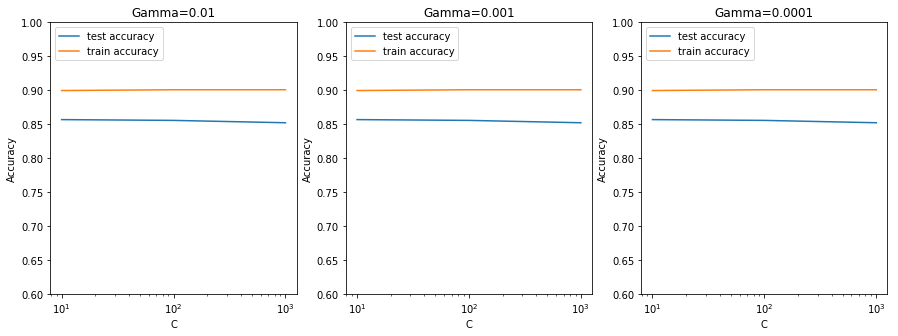

In [18]:
#Execute below codes for analysis 
cv_results['param_C'] = cv_results['param_C'].astype('int')
plt.figure(figsize=(15,5))

plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]
plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]
plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]
plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')



In [22]:
#Execute below to choose best hyper params
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print(best_score)
print(best_hyperparams)

0.8682080924855491
{'C': 100, 'gamma': 0.001}


# Sigmoid model

In [19]:
model = SVC(kernel="sigmoid")

from sklearn.model_selection import GridSearchCV

# Execute below to set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# Execute below to fit the models with range of parameters
model_cv.fit(X_train, y_train)                  

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.014000,2.002716e-03,0.006000,2.000213e-03,10,0.01,"{'C': 10, 'gamma': 0.01}",0.859122,0.854167,0.856647,0.002478,4,0.888889,0.872979,0.880934,0.007955
1,0.004073,4.072905e-03,0.009832,5.795002e-03,10,0.001,"{'C': 10, 'gamma': 0.001}",0.847575,0.819444,0.833526,0.014065,7,0.831019,0.836028,0.833523,0.002505
2,0.015627,8.344650e-07,0.000000,0.000000e+00,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.836028,0.819444,0.827746,0.008292,9,0.819444,0.836028,0.827736,0.008292
3,0.024081,7.168055e-03,0.004000,4.000187e-03,100,0.01,"{'C': 100, 'gamma': 0.01}",0.849885,0.837963,0.843931,0.005961,5,0.819444,0.803695,0.811570,0.007875
4,0.016003,4.529953e-06,0.007996,3.695488e-06,100,0.001,"{'C': 100, 'gamma': 0.001}",0.868360,0.868056,0.868208,0.000152,1,0.907407,0.891455,0.899431,0.007976
5,0.013815,1.815557e-03,0.009831,5.792737e-03,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.847575,0.819444,0.833526,0.014065,7,0.831019,0.836028,0.833523,0.002505
6,0.023438,7.812738e-03,0.007812,7.812500e-03,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.863741,0.814815,0.839306,0.024463,6,0.814815,0.817552,0.816183,0.001369
7,0.031252,8.344650e-07,0.000000,0.000000e+00,1000,0.001,"{'C': 1000, 'gamma': 0.001}",0.863741,0.856481,0.860116,0.003630,3,0.907407,0.893764,0.900586,0.006821
8,0.007812,7.812023e-03,0.015627,1.192093e-07,1000,0.0001,"{'C': 1000, 'gamma': 0.0001}",0.868360,0.868056,0.868208,0.000152,1,0.907407,0.891455,0.899431,0.007976


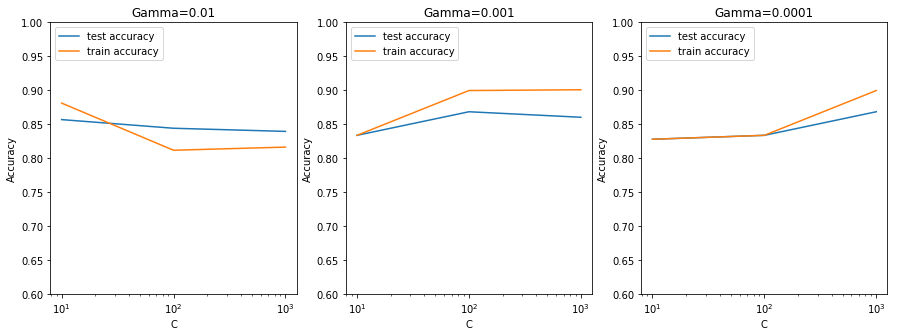

In [20]:
#Execute below codes for analysis 
cv_results['param_C'] = cv_results['param_C'].astype('int')
plt.figure(figsize=(15,5))

plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]
plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]
plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]
plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [21]:
#Execute below to choose best hyper params
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print(best_score)
print(best_hyperparams)

0.8682080924855491
{'C': 100, 'gamma': 0.001}


# RBF model

In [23]:
model = SVC(kernel="rbf")

from sklearn.model_selection import GridSearchCV

# Execute below to set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# Execute below to fit the models with range of parameters
model_cv.fit(X_train, y_train)                  

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.6s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.015999,3.999829e-03,0.012002,4.001021e-03,10,0.01,"{'C': 10, 'gamma': 0.01}",0.845266,0.833333,0.839306,0.005966,5,0.976852,0.974596,0.975724,0.001128
1,0.010000,2.001524e-03,0.008016,1.561642e-05,10,0.001,"{'C': 10, 'gamma': 0.001}",0.863741,0.831019,0.847399,0.016361,3,0.884259,0.859122,0.871691,0.012568
2,0.015626,4.768372e-07,0.000000,0.000000e+00,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.836028,0.819444,0.827746,0.008292,6,0.819444,0.836028,0.827736,0.008292
3,0.023852,8.226156e-03,0.022003,2.200282e-02,100,0.01,"{'C': 100, 'gamma': 0.01}",0.838337,0.817130,0.827746,0.010604,6,1.000000,1.000000,1.000000,0.000000
4,0.017815,2.185941e-03,0.009842,5.783319e-03,100,0.001,"{'C': 100, 'gamma': 0.001}",0.868360,0.861111,0.864740,0.003625,2,0.935185,0.914550,0.924867,0.010318
5,0.007813,7.813096e-03,0.023439,7.813334e-03,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.863741,0.831019,0.847399,0.016361,3,0.881944,0.861432,0.871688,0.010256
6,0.023439,7.812262e-03,0.007812,7.812500e-03,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.838337,0.807870,0.823121,0.015233,8,1.000000,1.000000,1.000000,0.000000
7,0.046877,2.384186e-07,0.015626,9.536743e-07,1000,0.001,"{'C': 1000, 'gamma': 0.001}",0.831409,0.814815,0.823121,0.008297,8,0.981481,0.979215,0.980348,0.001133
8,0.023438,7.812262e-03,0.000000,0.000000e+00,1000,0.0001,"{'C': 1000, 'gamma': 0.0001}",0.870670,0.863426,0.867052,0.003622,1,0.912037,0.896074,0.904055,0.007982


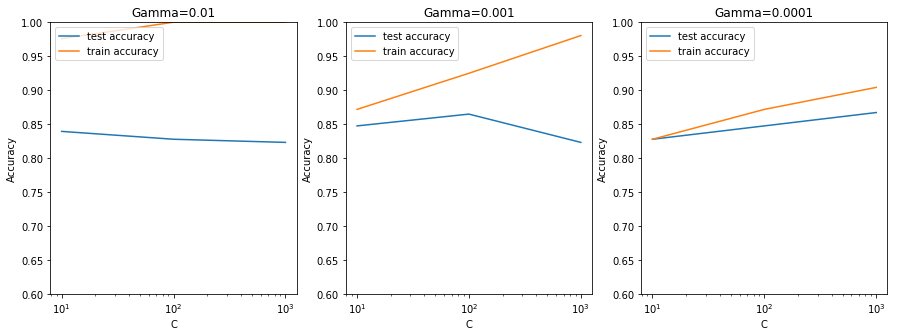

In [24]:
#Execute below codes for analysis 
cv_results['param_C'] = cv_results['param_C'].astype('int')
plt.figure(figsize=(15,5))

plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]
plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]
plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]
plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [25]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print(best_score)
print(best_hyperparams)

0.8670520231213873
{'C': 1000, 'gamma': 0.0001}


# Polynomial model

In [26]:
model = SVC(kernel="poly")

from sklearn.model_selection import GridSearchCV

# Execute below to set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# Execute below to fit the models with range of parameters
model_cv.fit(X_train, y_train)                  

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.016002,4.001021e-03,0.007998,0.000002,10,0.01,"{'C': 10, 'gamma': 0.01}",0.842956,0.824074,0.833526,0.009441,3,0.884259,0.879908,0.882083,0.002176
1,0.006001,2.000093e-03,0.004019,0.000018,10,0.001,"{'C': 10, 'gamma': 0.001}",0.836028,0.819444,0.827746,0.008292,4,0.819444,0.836028,0.827736,0.008292
2,0.007813,7.812858e-03,0.007814,0.007814,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.836028,0.819444,0.827746,0.008292,4,0.819444,0.836028,0.827736,0.008292
3,0.015628,1.192093e-06,0.015626,0.000001,100,0.01,"{'C': 100, 'gamma': 0.01}",0.840647,0.835648,0.838150,0.002499,1,0.993056,0.997691,0.995373,0.002317
4,0.014203,1.423478e-03,0.004000,0.004000,100,0.001,"{'C': 100, 'gamma': 0.001}",0.836028,0.819444,0.827746,0.008292,4,0.819444,0.836028,0.827736,0.008292
5,0.008002,0.000000e+00,0.004000,0.000002,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.836028,0.819444,0.827746,0.008292,4,0.819444,0.836028,0.827736,0.008292
6,0.015925,2.959967e-04,0.009831,0.005795,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.836028,0.835648,0.835838,0.000190,2,1.000000,1.000000,1.000000,0.000000
7,0.015625,4.768372e-07,0.007813,0.007813,1000,0.001,"{'C': 1000, 'gamma': 0.001}",0.831409,0.819444,0.825434,0.005982,9,0.821759,0.836028,0.828893,0.007134
8,0.000000,0.000000e+00,0.000000,0.000000,1000,0.0001,"{'C': 1000, 'gamma': 0.0001}",0.836028,0.819444,0.827746,0.008292,4,0.819444,0.836028,0.827736,0.008292


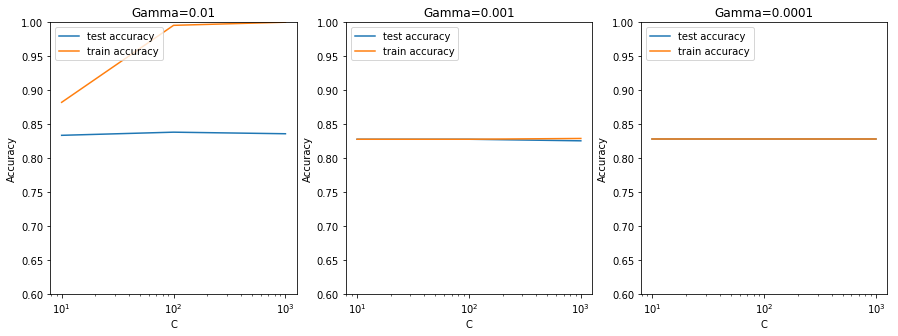

In [27]:
#Execute below codes for analysis 
cv_results['param_C'] = cv_results['param_C'].astype('int')
plt.figure(figsize=(15,5))

plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]
plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]
plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]
plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [28]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print(best_score)
print(best_hyperparams)

0.838150289017341
{'C': 100, 'gamma': 0.01}


# models with best parameters

In [31]:
from sklearn.metrics import accuracy_score

In [35]:
# Write the code to build model with best hyperparameters and find out the final test accuracy
model_best_linear = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr', 
            degree=3, gamma=0.001, kernel='linear',max_iter=-1, probability=False, random_state=None,
            shrinking=True,tol=0.001, verbose=False)

# code to fit the model
model_best_linear.fit(X_train,y_train)
# code to predict on X_train
y_train_pred = model_best_linear.predict(X_train)
#code to calculate training accuracy_score
print(accuracy_score(y_train,y_train_pred))
#code to predict on X_test
y_test_pred = model_best_linear.predict(X_test)
#code to calculate test accuracy_score
print(accuracy_score(y_test,y_test_pred))

0.900578034682081
0.8602150537634409


In [34]:
model_best_sigmoid = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr', 
            degree=3, gamma=0.001, kernel='sigmoid',max_iter=-1, probability=False, random_state=None,
            shrinking=True,tol=0.001, verbose=False)

# code to fit the model
model_best_sigmoid.fit(X_train,y_train)
# code to predict on X_train
y_train_pred = model_best_sigmoid.predict(X_train)
#code to calculate training accuracy_score
print(accuracy_score(y_train,y_train_pred))
#code to predict on X_test
y_test_pred = model_best_sigmoid.predict(X_test)
#code to calculate test accuracy_score
print(accuracy_score(y_test,y_test_pred))

0.8971098265895954
0.8494623655913979


In [33]:
# Write the code to build model with best hyperparameters and find out the final test accuracy
model_best_rbf= SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr', 
            degree=3, gamma=0.0001, kernel='rbf',max_iter=-1, probability=False, random_state=None,
            shrinking=True,tol=0.001, verbose=False)

# code to fit the model
model_best_rbf.fit(X_train,y_train)
# code to predict on X_train
y_train_pred = model_best_rbf.predict(X_train)
#code to calculate training accuracy_score
print(accuracy_score(y_train,y_train_pred))
#code to predict on X_test
y_test_pred = model_best_rbf.predict(X_test)
#code to calculate test accuracy_score
print(accuracy_score(y_test,y_test_pred))

0.9017341040462428
0.8494623655913979


In [32]:
model_best_poly= SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr', 
            degree=3, gamma=0.01, kernel='poly',max_iter=-1, probability=False, random_state=None,
            shrinking=True,tol=0.001, verbose=False)

# code to fit the model
model_best_poly.fit(X_train,y_train)
# code to predict on X_train
y_train_pred = model_best_poly.predict(X_train)
#code to calculate training accuracy_score
print(accuracy_score(y_train,y_train_pred))
#code to predict on X_test
y_test_pred = model_best_poly.predict(X_test)
#code to calculate test accuracy_score
print(accuracy_score(y_test,y_test_pred))

0.991907514450867
0.8279569892473119
